In [1]:
%%markdown
# 1. Find and Download a Dataset:

# 1. Find and Download a Dataset:


In [2]:
# We have found a dataset on Kaggle that contains both numerical and categorical data and some missing values. The dataset is called "Tested" and it is located in the resources folder.

In [3]:
%%markdown
# 2. Data Exploration:

# 2. Data Exploration:


In [4]:
#Load the dataset using pandas.

import pandas as pd

df = pd.read_csv('../resources/tested.csv')

In [5]:
#Use .describe(), .info(), and .head() to explore the dataset's structure,summary statistics, and first few rows. Use comments or markdown cells to explain the data.

# Dataframe describe method provides the summary statistics of the dataset.
print(df.describe())

# Dataframe info method provides the structure of the dataset.
print(df.info())

# Dataframe head method provides the first few rows of the dataset.
print(df.head())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data colu

In [6]:
%%markdown
# 3. Data Cleaning:

# 3. Data Cleaning:


In [7]:
# Indentify columns with missing values.

missing_values = df.isnull().any()
print("Columns with missing values:")
print(missing_values[missing_values == True].index.tolist())

Columns with missing values:
['Age', 'Fare', 'Cabin']


In [8]:
# For numerical columns, interpolate missing values
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].interpolate()

In [9]:
# Replace missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [10]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [11]:
# Drop extreme outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

multiplier = 1.5
outliers = (df[numerical_columns] < (Q1 - multiplier * IQR)) | (df[numerical_columns] > (Q3 + multiplier * IQR))

df = df[~outliers.any(axis=1)]

In [12]:
%%markdown
# 4. Data Visualization:

# 4. Data Visualization:


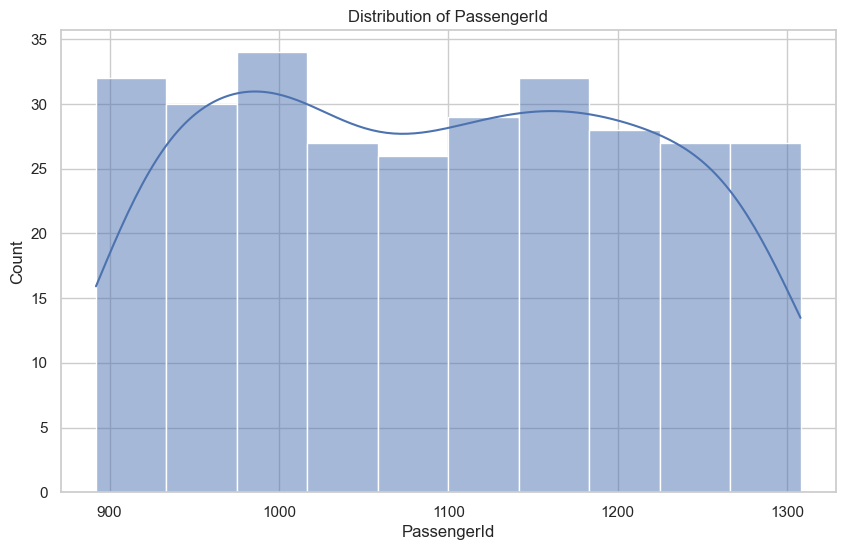

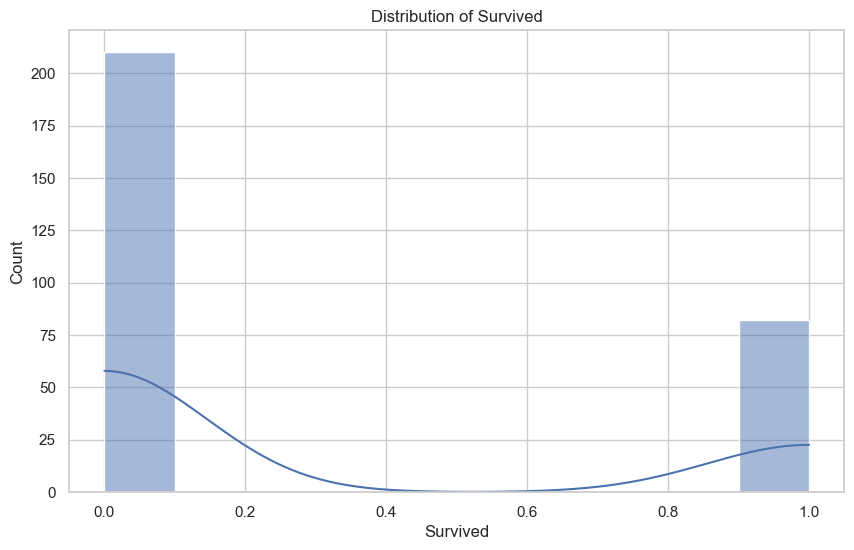

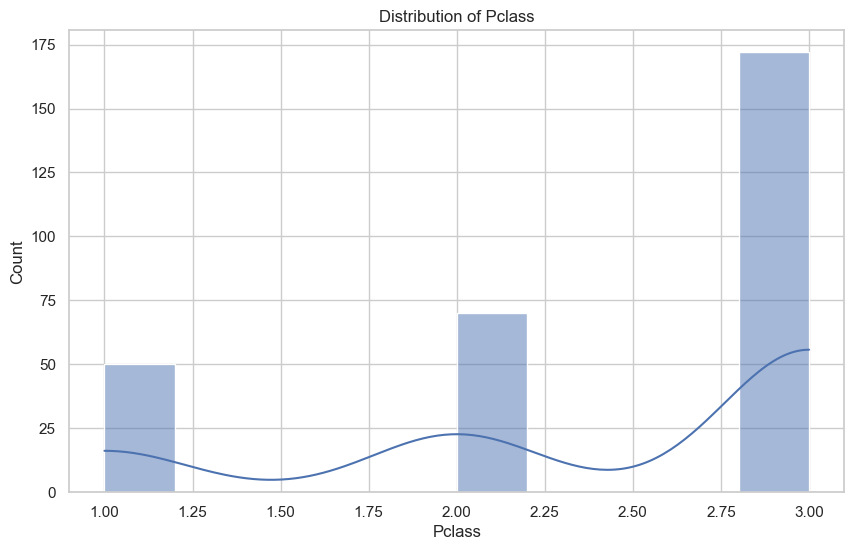

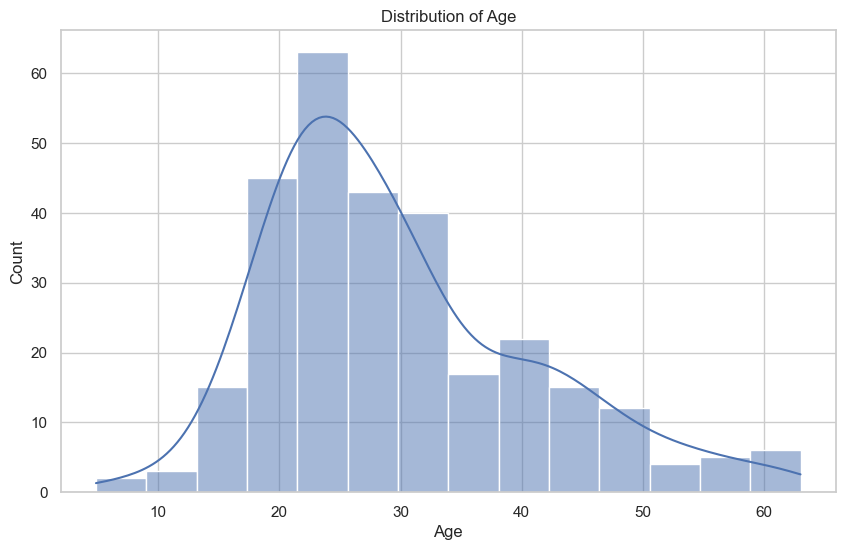

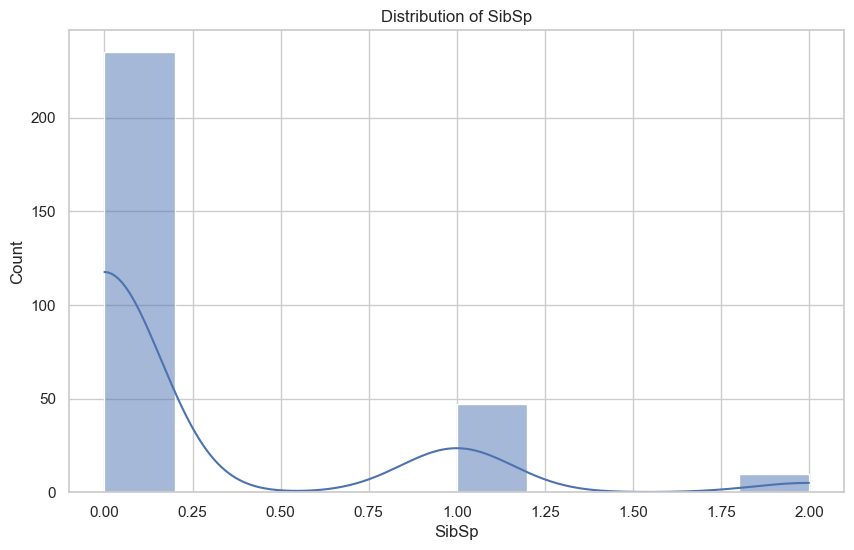

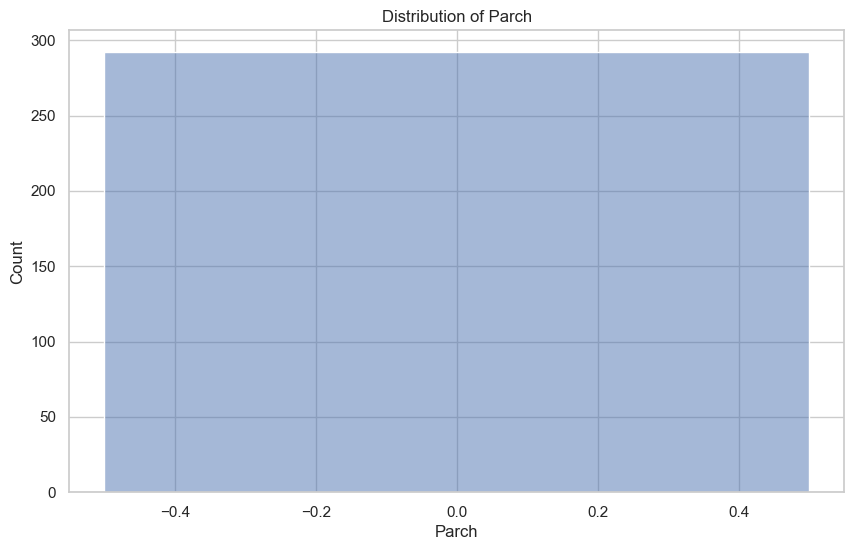

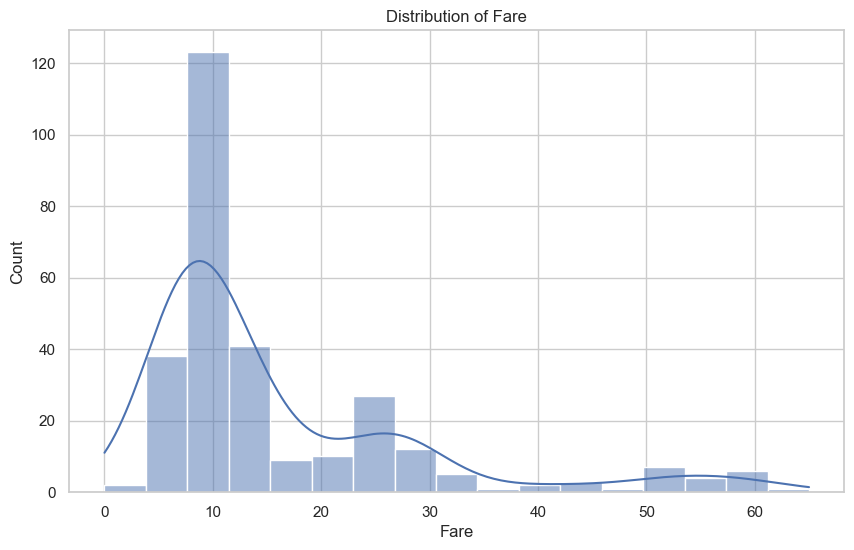

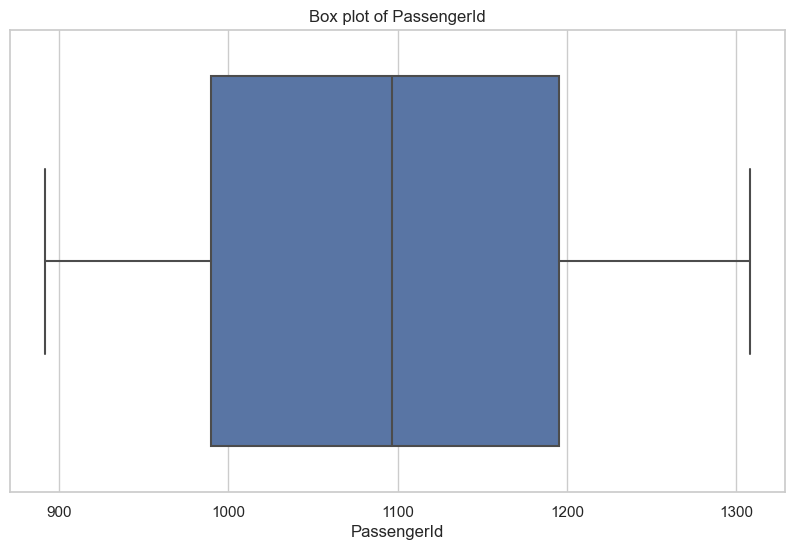

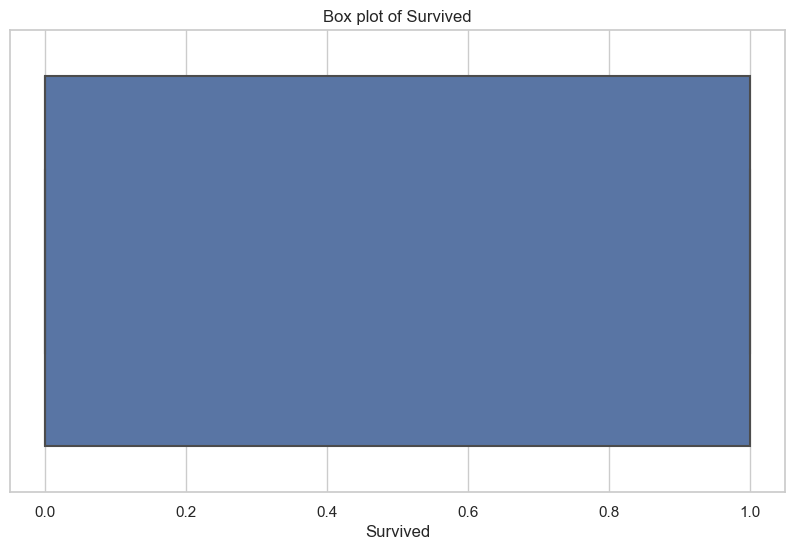

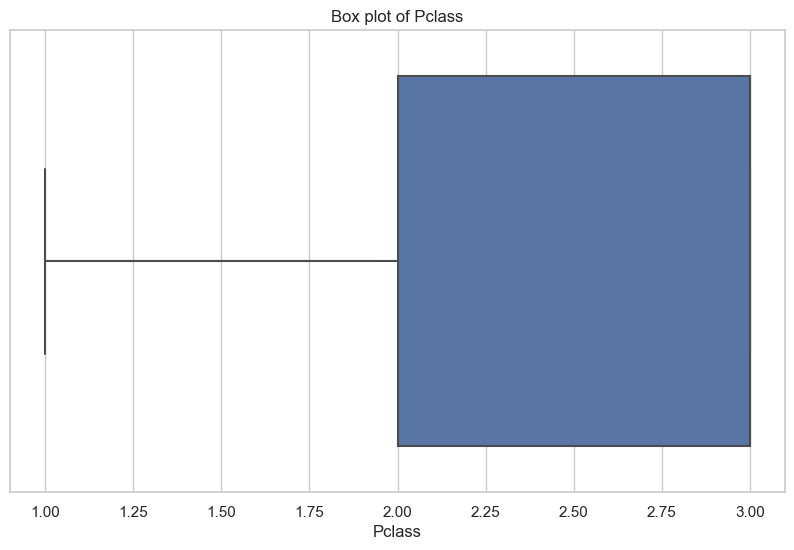

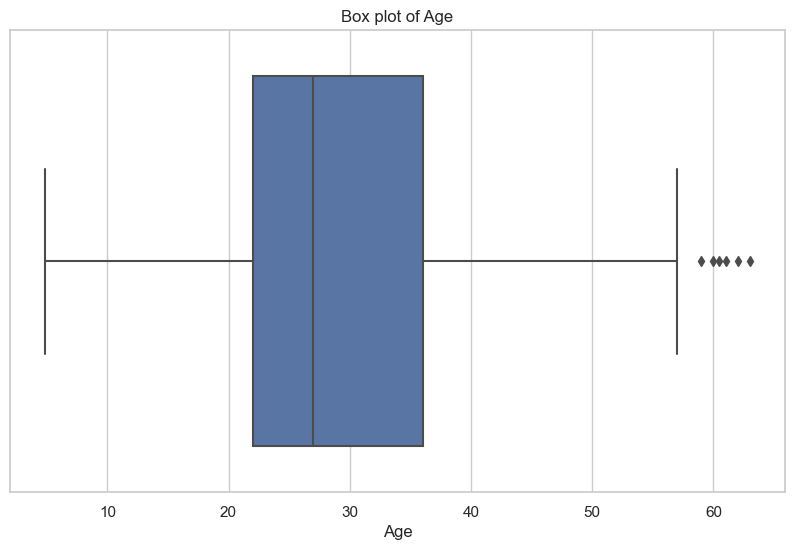

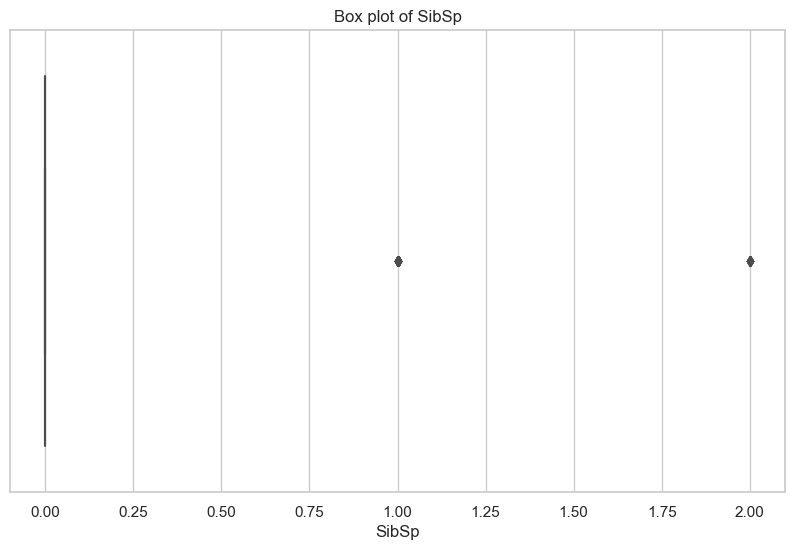

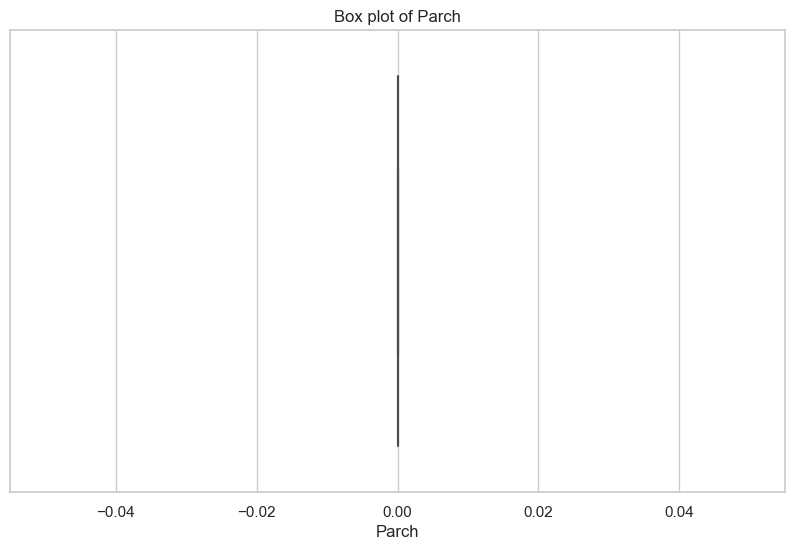

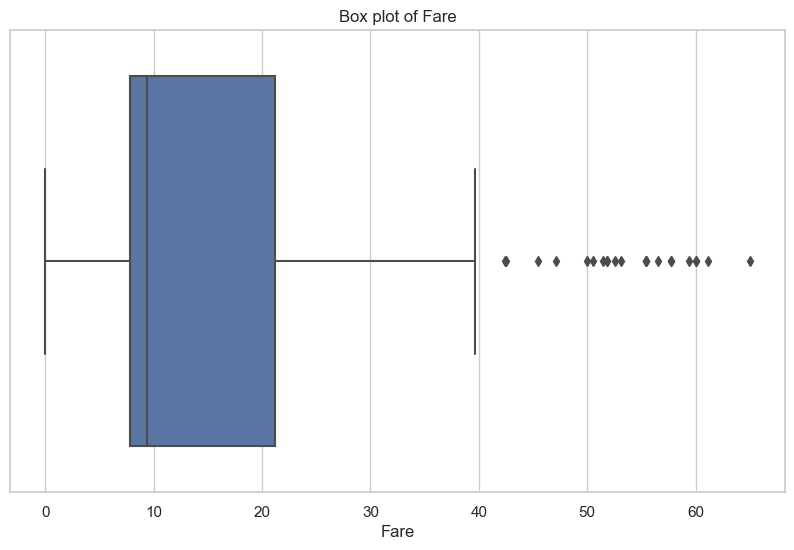

In [ ]:
# Use matplotlib or seaborn to visualize the distribution of variables both quantitative and categorical (parametric and non-parametric)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms for all numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Box plots for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()
    
# Count plots for all categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Count plot of {column}')
    plt.xticks(rotation=45)
    plt.show()
